## Keras Linear Regression without callbacks

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [17]:
np.random.seed(0)

### Step 1. Make random data

In [18]:
def make_random_data():
    x = np.random.uniform(low=-2, high=2, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, scale=(0.5 + t*t/3), size=None)
        y.append(r)
    return  x, 1.726*x -0.84 + np.array(y)

### Display data

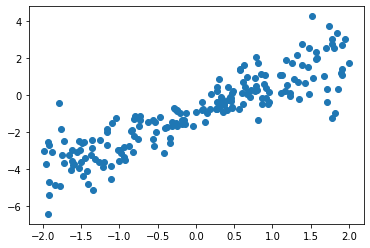

In [19]:
x, y = make_random_data() 

plt.plot(x, y, 'o')
plt.show()

### Make training and test data

In [20]:
epoch=100
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

### Step 2-3. Sequential Model, Loss, Optimizer

In [21]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.summary()
model.compile(optimizer='sgd', loss='mse')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### Step 4. Training the Model with no callbacks

In [22]:
history = model.fit(x_train, y_train, epochs=100,
                    validation_split=0.2)

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 2ms/sample - loss: 2.4947 - val_loss: 1.3544
Epoch 2/100
120/120 [==============================] - 0s 125us/sample - loss: 2.1978 - val_loss: 1.2262
Epoch 3/100
120/120 [==============================] - 0s 133us/sample - loss: 1.9575 - val_loss: 1.1265
Epoch 4/100
120/120 [==============================] - 0s 125us/sample - loss: 1.7622 - val_loss: 1.0457
Epoch 5/100
120/120 [==============================] - 0s 125us/sample - loss: 1.5988 - val_loss: 0.9785
Epoch 6/100
120/120 [==============================] - 0s 117us/sample - loss: 1.4586 - val_loss: 0.9282
Epoch 7/100
120/120 [==============================] - 0s 125us/sample - loss: 1.3458 - val_loss: 0.8870
Epoch 8/100
120/120 [==============================] - 0s 117us/sample - loss: 1.2489 - val_loss: 0.8563
Epoch 9/100
120/120 [==============================] - 0s 125us/sample - loss: 1.1718 - val_loss: 0.8331
Epoch 10/100

Epoch 78/100
120/120 [==============================] - 0s 117us/sample - loss: 0.7887 - val_loss: 0.8356
Epoch 79/100
120/120 [==============================] - 0s 133us/sample - loss: 0.7891 - val_loss: 0.8366
Epoch 80/100
120/120 [==============================] - 0s 117us/sample - loss: 0.7888 - val_loss: 0.8368
Epoch 81/100
120/120 [==============================] - 0s 125us/sample - loss: 0.7885 - val_loss: 0.8362
Epoch 82/100
120/120 [==============================] - 0s 125us/sample - loss: 0.7889 - val_loss: 0.8365
Epoch 83/100
120/120 [==============================] - 0s 125us/sample - loss: 0.7887 - val_loss: 0.8362
Epoch 84/100
120/120 [==============================] - 0s 117us/sample - loss: 0.7881 - val_loss: 0.8368
Epoch 85/100
120/120 [==============================] - 0s 133us/sample - loss: 0.7888 - val_loss: 0.8374
Epoch 86/100
120/120 [==============================] - 0s 117us/sample - loss: 0.7882 - val_loss: 0.8375
Epoch 87/100
120/120 [========================

### Step 5. Test the Model

In [23]:
test_loss = model.evaluate(x_test, y_test, verbose=2)
print('test_loss = ', test_loss)

50/1 - 0s - loss: 0.7809
test_loss =  0.9625390601158142


###  Display Training & Validataion Losses

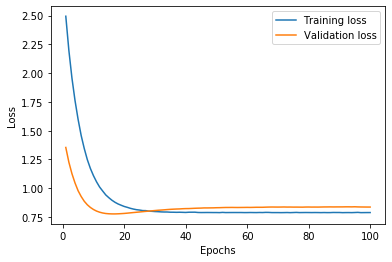

In [24]:
epochs = np.arange(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Display the Regression Result

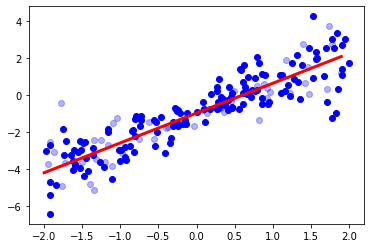

In [25]:
x_arr = np.arange(-2, 2, 0.1)
y_arr = model.predict(x_arr)

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr, '-r', lw=3)
plt.show()